In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tfi_exact # for later comparison


In [2]:
import a_mps

L = 14

In [3]:
# a)
psi0 = a_mps.init_spinup_MPS(14)
Sz = np.array([[1., 0.], [0., -1.]])
exp_val_Sz = psi0.site_expectation_value(Sz)
print(exp_val_Sz)
Sx = np.array([[0., 1.], [1., 0.]])
exp_val_Sx = psi0.site_expectation_value(Sx)
print(exp_val_Sx)
assert exp_val_Sz[0] == 1.
assert exp_val_Sx[0] == 0.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
# b)
def init_spinright_MPS(L):
    """Return a product state with all spins up as an MPS"""
    B = np.zeros([1, 2, 1], np.float)
    B[0, 0, 0] = B[0, 1, 0] = 0.5**0.5
    S = np.ones([1], np.float)
    Bs = [B.copy() for i in range(L)]
    Ss = [S.copy() for i in range(L)]
    return a_mps.MPS(Bs, Ss)


psi1 = init_spinright_MPS(14)
exp_val_Sz = psi1.site_expectation_value(Sz)
print(exp_val_Sz)
exp_val_Sx = psi1.site_expectation_value(Sx)
print(exp_val_Sx)
assert exp_val_Sz[0] == 0.
assert abs(exp_val_Sx[0] -1.) < 1.e-15  # correct up to rounding errors of machine precision


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
# c)
import b_model
for g in [0.5, 1., 1.5]:
    print("g =", g)
    model = b_model.TFIModel(L, 1. , g)
    print("energy of |up.... up>", model.energy(psi0))
    print("energy of |right ... right>", model.energy(psi1))
# as expected :D

g = 0.5
energy of |up.... up> -7.0
energy of |right ... right> -13.000000000000004
g = 1.0
energy of |up.... up> -14.0
energy of |right ... right> -13.000000000000004
g = 1.5
energy of |up.... up> -21.0
energy of |right ... right> -13.000000000000004


In [6]:
# d)
import c_tebd
E, psi, model = c_tebd.example_TEBD_gs_finite(14, 1., 1.5)

finite TEBD, (imaginary time evolution)
L=14, J=1.0, g=1.50
dt = 0.10000: E = -23.1210722544100
dt = 0.01000: E = -23.2133644786914
dt = 0.00100: E = -23.2220037685472
dt = 0.00010: E = -23.2228606166766
dt = 0.00001: E = -23.2229463553360
final bond dimensions:  [2, 4, 8, 13, 17, 18, 18, 18, 17, 13, 8, 4, 2]
Exact diagonalization: E = -23.2229594341173
relative error:  5.631832278549063e-07


# Global quench

Text(0.5,0,'time $t$')

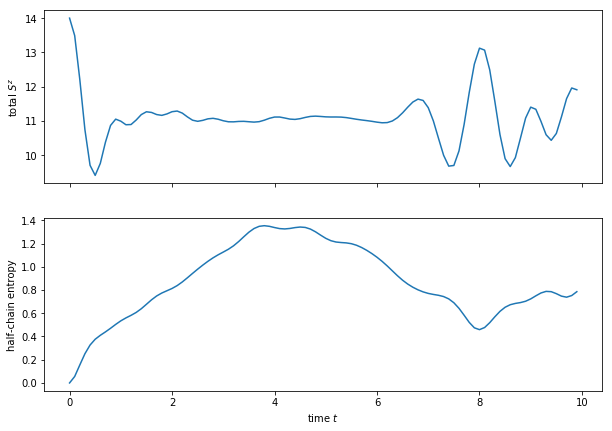

In [7]:
# e)
chi_max = 30
eps = 1.e-10
L = 14
model = b_model.TFIModel(L, 1., 1.5)
dt = 0.1
N_steps = 1
U_bonds = c_tebd.calc_U_bonds(model, 1.j*dt)
ts = np.arange(0., 10., dt*N_steps)
psi = a_mps.init_spinup_MPS(L)
Sz_tot = []
S = []
for t in ts:
    Sz_tot.append(np.sum(psi.site_expectation_value(model.sigmaz)))
    S.append(psi.entanglement_entropy()[psi.L//2])
    c_tebd.run_TEBD(psi, U_bonds, N_steps, chi_max, eps)
    
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 7))
ax1.plot(ts, Sz_tot)
ax2.plot(ts, S)
ax1.set_ylabel("total $S^z$")
ax2.set_ylabel("half-chain entropy")
ax2.set_xlabel("time $t$")



L=L
dt=0.100, chi=30
dt=0.010, chi=30
dt=0.020, chi=128


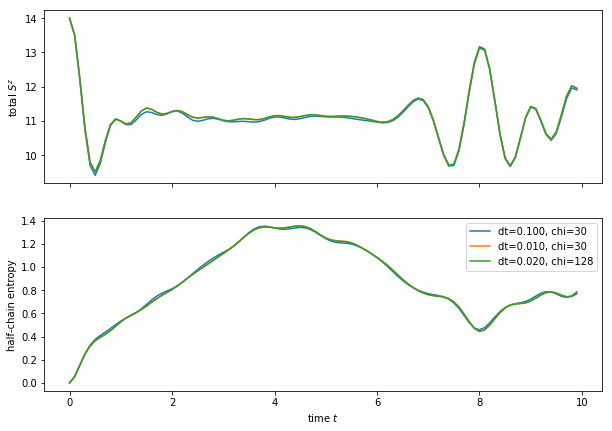

In [8]:
# f) converged in dt, chi?
L = 14
print("L=L")
model = b_model.TFIModel(L, 1., 1.5)
eps = 1.e-10

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 7))
for dt, N_steps, chi in [(0.1, 1, 30), (0.01, 10, 30), (0.02, 5, 128)]:  
    lbl = "dt={dt:.3f}, chi={chi:d}".format(dt=dt, chi=chi)
    print(lbl)
    U_bonds = c_tebd.calc_U_bonds(model, 1.j*dt)
    ts = np.arange(0., 10., dt*N_steps)
    psi = a_mps.init_spinup_MPS(L)
    Sz_tot = []
    S = []
    for t in ts:
        Sz_tot.append(np.sum(psi.site_expectation_value(model.sigmaz)))
        S.append(psi.entanglement_entropy()[psi.L//2])
        c_tebd.run_TEBD(psi, U_bonds, N_steps, chi_max, eps)
    ax1.plot(ts, Sz_tot, label=lbl)
    ax2.plot(ts, S, label=lbl)

ax2.legend()
ax1.set_ylabel("total $S^z$")
ax2.set_ylabel("half-chain entropy")
ax2.set_xlabel("time $t$")
plt.show()

L=L
dt=0.100, chi=30
dt=0.010, chi=30
dt=0.020, chi=60


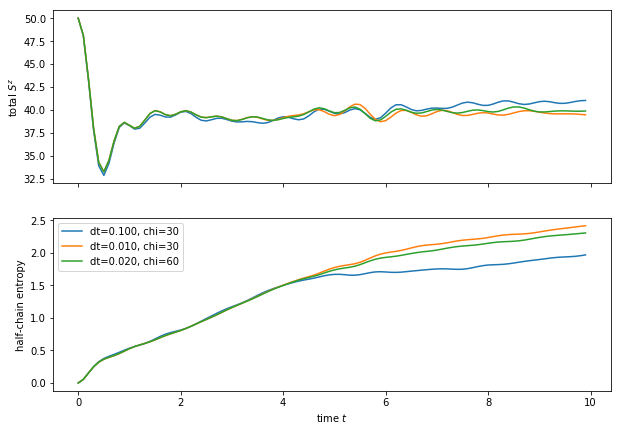

In [9]:
# and again for larger L
L = 50
print("L=L")
model = b_model.TFIModel(L, 1., 1.5)
eps = 1.e-10

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 7))
for dt, N_steps, chi in [(0.1, 1, 30), (0.01, 10, 30), (0.02, 5, 60)]:  
    lbl = "dt={dt:.3f}, chi={chi:d}".format(dt=dt, chi=chi)
    print(lbl)
    U_bonds = c_tebd.calc_U_bonds(model, 1.j*dt)
    ts = np.arange(0., 10., dt*N_steps)
    psi = a_mps.init_spinup_MPS(L)
    Sz_tot = []
    S = []
    for t in ts:
        Sz_tot.append(np.sum(psi.site_expectation_value(model.sigmaz)))
        S.append(psi.entanglement_entropy()[psi.L//2])
        c_tebd.run_TEBD(psi, U_bonds, N_steps, chi_max, eps)
    ax1.plot(ts, Sz_tot, label=lbl)
    ax2.plot(ts, S, label=lbl)

ax2.legend(loc='upper left')
ax1.set_ylabel("total $S^z$")
ax2.set_ylabel("half-chain entropy")
ax2.set_xlabel("time $t$")
plt.show()

In [10]:
# g)
def run_TEBD_secondorder(psi, U_bonds, U_bonds_half_dt, N_steps, chi_max, eps):
    Nbonds = psi.L - 1
    assert len(U_bonds) == len(U_bonds_half_dt) == Nbonds
    for i_bond in range(0, Nbonds, 2):
        c_tebd.update_bond(psi, i_bond, U_bonds_half_dt[i_bond], chi_max, eps)
    for i_bond in range(1, Nbonds, 2):
        c_tebd.update_bond(psi, i_bond, U_bonds[i_bond], chi_max, eps)
    for n in range(N_steps- 1):
        for k in [0, 1]:  # even, odd
            for i_bond in range(k, Nbonds, 2):
                c_tebd.update_bond(psi, i_bond, U_bonds[i_bond], chi_max, eps)
    for i_bond in range(0, Nbonds, 2):
        c_tebd.update_bond(psi, i_bond, U_bonds_half_dt[i_bond], chi_max, eps)
    # done

L=L
dt=0.100, chi=30
dt=0.010, chi=30
dt=0.020, chi=60


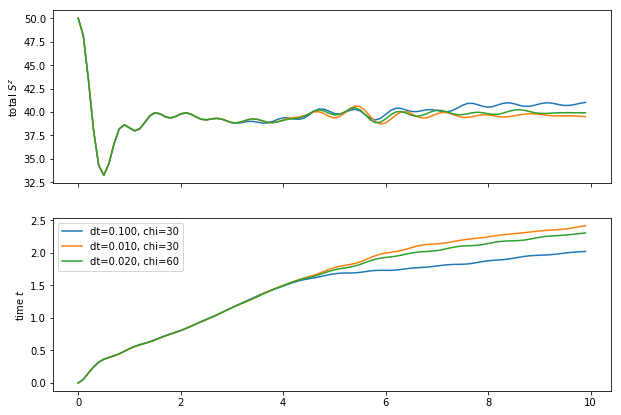

In [11]:
# regenerate previous plot: almost same code, changes marked with comments.
L = 50
print("L=L")
model = b_model.TFIModel(L, 1., 1.5)
eps = 1.e-10

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 7))
for dt, N_steps, chi in [(0.1, 1, 30), (0.01, 10, 30), (0.02, 5, 60)]:  
    lbl = "dt={dt:.3f}, chi={chi:d}".format(dt=dt, chi=chi)
    print(lbl)
    U_bonds = c_tebd.calc_U_bonds(model, 1.j*dt)
    U_bonds_half_dt = c_tebd.calc_U_bonds(model, 1.j*dt/2.)  # this line is new
    ts = np.arange(0., 10., dt*N_steps)
    psi = a_mps.init_spinup_MPS(L)
    Sz_tot = []
    S = []
    for t in ts:
        Sz_tot.append(np.sum(psi.site_expectation_value(model.sigmaz)))
        S.append(psi.entanglement_entropy()[psi.L//2])
        run_TEBD_secondorder(psi, U_bonds, U_bonds_half_dt, N_steps, chi_max, eps)  # this line changed
    ax1.plot(ts, Sz_tot, label=lbl)
    ax2.plot(ts, S, label=lbl)

ax2.legend(loc='upper left')
ax1.set_ylabel("total $S^z$")
ax2.set_ylabel("half-chain entropy")
ax2.set_ylabel("time $t$")
plt.show()


# Local quench

In [12]:
E, psi0, model = c_tebd.example_TEBD_gs_finite(50, 1., 1.5)

finite TEBD, (imaginary time evolution)
L=50, J=1.0, g=1.50
dt = 0.10000: E = -82.9616282068189
dt = 0.01000: E = -83.3684682230389
dt = 0.00100: E = -83.4079241722205
dt = 0.00010: E = -83.4118520933585
dt = 0.00001: E = -83.4122451665898
final bond dimensions:  [2, 4, 8, 13, 17, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 17, 13, 8, 4, 2]


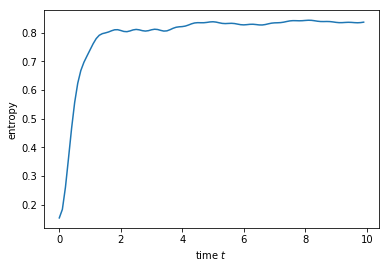

In [13]:
# get a copy of the ground state, to which we apply sigma_x on site i0 = L//2
psi = psi0.copy()
i0 = psi.L//2
new_B = np.tensordot(model.sigmax, psi.Bs[i0], axes=(1, 1))  # i [i*], vL [i] vR
new_B = np.transpose(new_B, [1, 0, 2])
psi.Bs[i0] = new_B

chi_max = 50
eps = 1.e-10


# do a time evolution
U_bonds = c_tebd.calc_U_bonds(model, 1.j*dt)
U_bonds_half_dt = c_tebd.calc_U_bonds(model, 1.j*dt/2.)  # this line is new
ts = np.arange(0., 10., dt*N_steps)
S = []
for t in ts:
    S.append(psi.entanglement_entropy())
    run_TEBD_secondorder(psi, U_bonds, U_bonds_half_dt, N_steps, chi_max, eps)  # this line changed
S = np.array(S)
# just for comparision: plot the half-chain entanglement
plt.figure()
plt.plot(ts, S[:, i0])
plt.xlabel("time $t$")
plt.ylabel("entropy")
plt.show()

In [14]:
from lanczos import colorplot

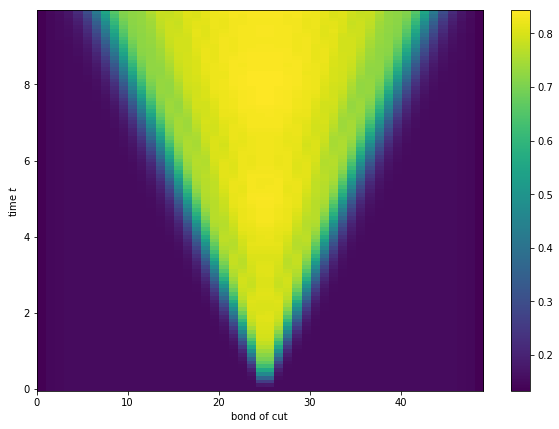

In [28]:
plt.figure(figsize=(10, 7))
xs = np.arange(0.5, psi.L-1, 1)
colorplot(xs, ts, S.T)
plt.xlabel("bond of cut")
plt.ylabel("time $t$")
plt.colorbar()
plt.show()